## Seaborn: scatterplot e lineplot ##

Procediamo in modo simile per Python e notiamo le differenze.
Come per R, la definizione delle librerie da utilizzare è di solito la prima operazione. La `import` di Python equivale alla `library()` di R.

La differenza sta nella definizione di un **alias** (es. `as pd`, `as plt`, `as sns`). L'uso degli alias è motivato da ragioni di comodità. Python a differenza di R, richiede la specifica esplicita della libreria di appartenenza di una funzione. Per cui, ad esempio, per leggere un dataset csv dovremmo usare `pandas.read_csv()`, per creare uno scatterplot `seaborn.scatterplot()`, per visualizzare un grafico `matplotlib.pyplot.show()` e così via per ogni funzione, ogni volta che le si usa.
Viene comodo semplificare con alias brevi e standard: `pd.read_csv()`, `sns.scatterplot()`, `plt.show()` etc.

In [1]:
# librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**lettura del datatset dagli Open Data del Comune di Milano**

La lettura del dataset tra R e Python è analoga. L'unica differenza è che Python prevede un'unica funzione `pd.read_csv()` con l'eventuale specifica del parametro `sep=` per definire il carattere separatore (il default è la virgola).<br>
La documentazione di pandas fornisce le informazioni nella forma più esaustiva insieme ad alcuni esempi:[`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv).

In [2]:
#lettura del dataset
df_py=pd.read_csv("datasets/comune_milano/temperature2018.csv", 
    sep=",")
df_py

,Zone,Id Sensore,DataOra,Media
0,Lambrate,2001,2018-01-01T00:00:00Z,3.5
1,Zavattari,5920,2018-01-01T00:00:00Z,3.2
2,Juvara,5909,2018-01-01T00:00:00Z,4.0
3,Feltre,8162,2018-01-01T00:00:00Z,3.2
4,Brera,5897,2018-01-01T00:00:00Z,3.6
...,...,...,...,...
52417,Zavattari,5920,2018-12-31T00:00:00Z,6.1
52418,Juvara,5909,2018-12-31T00:00:00Z,5.8
52419,Feltre,8162,2018-12-31T00:00:00Z,1.6
52420,Brera,5897,2018-12-31T00:00:00Z,6.4


**verifica del tipo di dati e conversione**

Il formato della variabile `DataOra` convertito da R non è riconosciuto da pandas e occorre convertirlo nuovamente. Con la funzione `dtypes` applicata al data frame vediamo il tipo di dato associato alle colonne. `DataOra` è `object`, cioè alfanumerico.

In [3]:
df_py.dtypes

Zone           object
Id Sensore      int64
DataOra        object
Media         float64
dtype: object

La funzione [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html?highlight=to_datetime#pandas.to_datetime) ha varie opzioni, tra cui quella di specificare esplicitamente il formato da convertire con il parametro `format=`. Il formato ricalca esattamente la forma dei valori originali, quindi, nel nostro caso, abbiamo valori del tipo:

    2018-12-31T00:00:00Z --> Anno-mese-giornoTOra:Min:SecZ 
                         --> %Y-%m-%dT%H:%M:%SZ

Per un elenco completo di tutti i simboli associati ai valori di data/tempo si veda la tabella dei [Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

**_NOTA BENE:_**
Notare la sintassi per selezionare una colonna: `data_frame["nome_colonna"]`.
L'uso delle parentesi quadre è la norma in Python per indicare delle liste di elementi.

In [4]:
#conversione di tipo
df_py["DataOra"] = pd.to_datetime(df_py["DataOra"], 
    format='%Y-%m-%dT%H:%M:%SZ')

In [5]:
df_py.dtypes

Zone                  object
Id Sensore             int64
DataOra       datetime64[ns]
Media                float64
dtype: object

L'uso di `.dt.normalize()` al posto del formato esplicito è un'alternativa.

In [ ]:
df_py["DataOra"] = pd.to_datetime(df_py["DataOra"]).dt.normalize()

## Scatterplot ##

La funzione [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) produce il grafico corrispondente.

**_NOTA BENE:_**
Oltre alla definizione delle funzioni, [seaborn](https://seaborn.pydata.org/index.html) ha un'ottima documentazione anche nella **Example Gallery** e nel **Tutorial** con molti esempi chiari e semplici da consultare. Non serve altra documentazione per l'uso delle funzioni di seaborn che non siano dettagli specifici (es. formattazione degli assi, spostare la legenda, etc.) di cui solitamente si trovano informazioni nei forum (es. Stackoverflow)

La forma delle funzioni di seaborn è chiaramente diversa da quella di ggplot2, più semplice ma meno flessibile e poco adatta a produrre grafici diversi dalla forma standard. Per contro ggplot2 adotta una forma dichiarativa che costruisce il grafico per livelli successivi (*Grammar of Graphics*), ognuno riferito a un nuovo oggetto grafico.

Esclusa questa differenza importante, i parametri della funzione di Seaborn sono semplici da interpretare: `hue` corrisponde a `color` di ggplot2, `s` a `size`, `alpha`, `data`, `x` e `y` sono analoghi.

La posizione della legenda deve essere controllata esplicitamente (senza verrebbe posta al centro del grafico) e per farlo bisogna ricorrere a funzioni di matplotlib (es. `plt.legend()`, altre ne esistono), non avendo seaborn funzioni proprie.

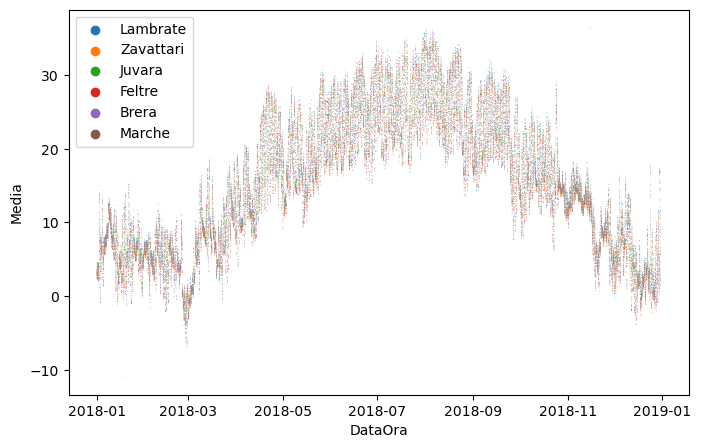

In [6]:
# scatterplot    
plt.figure(figsize = (8,5))
sns.scatterplot(data=df_py, x="DataOra", y="Media", 
  hue="Zone", s=0.2, alpha=1.0)
plt.legend(loc='upper left')

**volendo salvarlo come file png** 

In [ ]:
plt.savefig("scatter_1.png")

Per una panoramica delle varie opzioni grafiche (es. formato dei marker, palette di colori personalizzate, dimensione proporzionale rispetto ai valori di una variabile) si rimanda alle pagine del tutorial di seaborn per le funzioni [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) e [`seaborn.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) (quest'ultima è la funzione che aggiunge allo scatterplot la o le linee di regressione lineare).

## Lineplot ##

Per evidenziare in modo chiaro la linea si seleziona una sola zona della città. 

<AxesSubplot:xlabel='DataOra', ylabel='Media'>

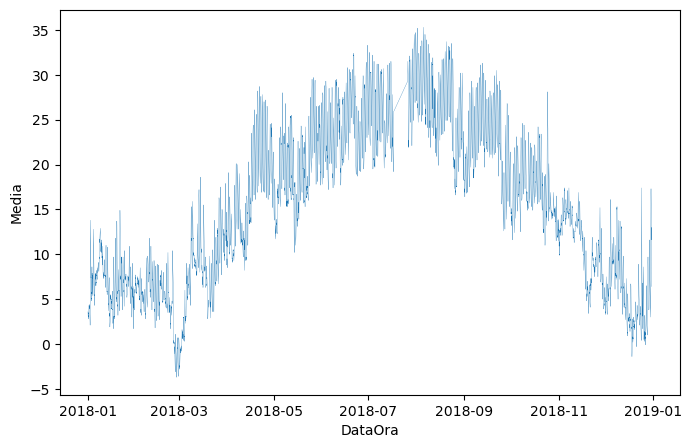

In [15]:
# lineplot 
plt.figure(figsize = (8,5))
sns.lineplot(data=df_py[df_py["Zone"]=="Brera"], x="DataOra", y="Media", 
             linewidth =0.2)